In [19]:
%matplotlib inline
from sklearn.datasets import make_moons
X, y = make_moons(
    n_samples=500,  # the number of observations
    random_state=1,
    noise=0.3
)

### Is this a regression or classification problem?

This is a classification problem.

### Conceptually, how is KNN being applied to this problem to make a prediction?

The values in $X$ are two-dimensional tuples.  These can be plotted in $\mathbb{R}^2$.  Each point is compared to its nearest neighboring points.  These comparisons are used to classify each point and create a decision boundary to separate the two classes in $y$.

### What predictions would an ideal machine learning model make, with respect to a decision boundary?

I'm not sure what you mean.  I will say that _ideally_ in a KNN classifier, the model will have the perfect balance between bias and variance so that it both classifies accurately and generalizes well to new data.

Change the value of K, show the error for a variety of K, more is better...
	Choose a very small value of K.
		Do you "see" low variance or high variance? 
	 	Do you "see" low bias or high bias?

	Repeat this with a very large value of K. 
		Do you "see" low variance or high variance? 
		Do you "see" low bias or high bias?

	Try using other values of K. 
		What value of K do you think is "best"? Evaluate as many K as possible 10+.
		How do you define "best"?

Max Error: 0.157575757576
Max Error k value: 2

Min Error: 0.0909090909091
Min Error k value: 23


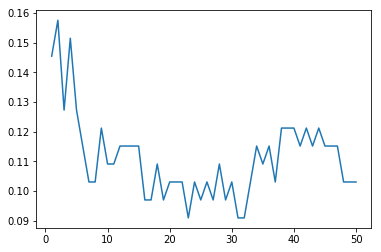

In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
err = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    err.append(1 - np.mean(y_test == pred))
    
neighbors = list(range(1,51))

plt.figure()
plt.plot(neighbors, err)

print "Max Error: " + str(max(err))
print "Max Error k value: " + str(neighbors[np.argmax(err)]) + "\n"
print "Min Error: " + str(min(err))
print "Min Error k value: " + str(neighbors[np.argmin(err)])

### Why should we care about variance at all? 

Broadly, variance is related to the precision of an estimator.  The higher the variance, the lower the precision.  In the context of KNN, if the variance is too high, the model will overfit the data and will not generalize well.

### Shouldn't we just minimize bias and ignore variance?

No, because even if an estimator is unbiased $\left(E(\hat{\theta}) = \theta\right)$, if the variance is too high the estimator will be inconsistent, leading to lower accuracy.  In the context of KNN, if the bias is too low the model will underfit the data and will not categorize accurately.

### Does a high value for K cause "overfitting" or "underfitting"?

A high value for $k$ causes under fitting.

### Bonus. Make those fancy plots I had in class, with the decision boundary shown, along with the points and thier respect classes shown by way of different colors.